# The multilayer perceptron, a universal approximator

We will try to answer: Is there something an MLP cannot approximate?

* G. Cybenko. Approximation by superpositions of a sigmoidal function. Math. Control Signal, 1989.
  + For sigmoid.
* K. Hornik. Approximation capabilities of multilayer feedforward networks. Neural Networks, 1991.
* A. Pinkus, Approximation theory of the MLP model in neural networks, 1999

## Two famous universal approximation theorems

````{prf:definition}
:label: net_notation_def
For $d\in\mathbb{N}$ and $M, N, L \in \mathbb{N}\cup \{\infty\}$ we denote by $\mathcal{NN}_{d,M,N,L}^f$ the set of all neural networks $\phi:\mathbb{R}^d\to\mathbb{R}$ with the activation function $f$ after each layer (except the last), such that $M(\phi), N(\phi), L(\phi) < \infty$ and $M(\phi)\le M$, $N(\phi)\le N$, and $L(\phi)\le L$.

With
* $L(\phi)$ the number of layers,
* $N(\phi)$ the number of neurons, defined as $N(\phi) = d + \sum_{j=1}^L N_j$, and
* $M(\phi)$ the number of non-zero parameters, i.e., $\sum_{j=1}^L \|A_j\|_0 + \|b_j\|_0$.
````

````{prf:theorem} Hornik's universal approximation theorem
:label: hornik_thm
If $f$ is continuous, bounded and non-constant and $X\subset \mathbb{R}^d$ is compact, then

$$\overline{\mathcal{NN}_{d,\infty,\infty,2}^f}=C(X).$$
````

````{prf:theorem}  Pinkus's universal approximation theorem
:label: Pinkus_thm
If $f$ is continuous and $X\subset \mathbb{R}^d$ is compact, then

$$\overline{\mathcal{NN}_{d,\infty,\infty,2}^f}=C(X)$$

iff $f$ is not a polynomial.
````

## A one-dimensional universal approximation theorem

````{prf:lemma} A one-dimensional approximation theorem, [source.](https://mjt.cs.illinois.edu/dlt/index.pdf).
:label: 1d_approx_thm
Let $g:\mathbb{R}\to\mathbb{R}$ be an L-Lipschitz function. Then for any $\epsilon > 0$ there exists a two-layer network $f$ with $\lceil\frac{L}{\epsilon}\rceil$ binary nodes $z\mapsto 1[z\ge0]$ such that $\sup_{x\in[0,1]} |f(x) - g(x)| \le \epsilon$.
````

```{admonition} Click for proof.
:class: dropdown
````{prf:proof}

We define

1. $m = \lceil\frac{L}{\epsilon}\rceil$,
2. $b_i = i\epsilon / L$ with $i\in\{0,..,m-1\}$,
3. $a_0 = g(0)$,
4. $a_i = g(b_i) - g(b_{i-1})$,
5. $f(x) = \sum_{i=0}^{m-1} a_i 1[x\ge b_i]$,
6. $x\in[0,1]$ and $k$ the largest index with $b_k\le x$.

From 6. we get that $f$ is constant over $[b_k,x]$.
We also have

$$|g(x) - f(x)| \le |g(x) - g(b_k)| + |g(b_k) - f(b_k)| + |f(b_k) - f(x)|$$
$$\le L |x - b_k| + |g(b_k) - \sum_{i=0}^k a_i| + 0$$
$$\le L \frac{\epsilon}{L} + |g(b_k) - g(b_0) - \sum_{i=i}^k g(b_i) - g(b_{i-1})| = \epsilon$$

$\square$
```

## A ReLU universal approximation theorem

````{prf:theorem} (A) Riesz representation theorem, [source.](https://link.springer.com/book/10.1007/3-540-34286-9)
:label: rmk_thm
Let $K$ be a compact metric space. Then, for any continuous linear functional $v'\ne0$ on $C(K)$ there exists a signed measure $\sigma\ne0$ on the Borel-$\sigma$-Algebra of $K$ such that

$$\forall f\in C(K): \; v'(f) = \int_K f(x)d\sigma(x).$$
````

````{prf:theorem} ReLU's universal approximation theorem, [source.](https://www.math.tu-berlin.de/fileadmin/i26_fg-kutyniok/Petersen/DGD_Approximation_Theory.pdf#subsubsection.2.2.3)
:label: relu_thm
If $X\subset \mathbb{R}^d$ is compact, with $X=\overline O$, where $O$ some open set, then

$$\overline{\mathcal{NN}_{d,\infty,\infty,3}^\mbox{ReLU}}=C(X).$$
````

```{admonition} Click for proof.
:class: dropdown
````{prf:proof}

As it is easy to check that $U = \mathcal{NN}_{d,\infty,\infty,3}^\mbox{ReLU}$ is a linear subspace of $C(X)$, we only need to proof that it is dense. We will do a proof by contradiction.

Hahn-Banach theorem $\Rightarrow$ $\exists$ functional $v'\ne0$ s.t. $v'(f) = 0\ \forall f\in U$

Riesz representation theorem $\Rightarrow$ $\exists$ signed measure $\sigma\ne0$ such that

$$\int_X f(x)d\sigma(x) = 0 \ \forall f\in U.$$

We will now show that for any cuboid $Q\subset X \ \exists (f_n)_{n \in\mathbb{N}}\subset U$, such that $f_n \to \chi_Q$ pointwise and $f_n \le f_{n+1}$ pointwise.

But, by the montone convergence theorm -- and therin will lies the contradiction -- this means, that $\sigma(Q) = 0 \ \forall $ cuboids.

We begin by defining the cuboid

$$Q= \Pi_{i=1}^d [c_i, e_i] \subset X$$

and the function

$$
\begin{aligned}
    t_i^n:\mathbb{R}\ni x \mapsto t_i^n(x) = &\mbox{ReLU}(nx_i - nc_i) - \mbox{ReLU}(nx_i -nc_i-1) \\
    + &\mbox{ReLU}(nx_i-ne_i) - \mbox{ReLU}(nx_i-ne_i+1),
\end{aligned}
$$

for $i=1,..,d$; see below for a plot. By construction we have $t_i^n$ is $1$ on $[c_i + 1/n, e_i - 1/n]$ and $t_i^{n+1}(x)\le t_i^{n+1}(x)$.

We now further define

$$h_n(x) = \mbox{ReLU}\left(\sum_{i=1}^d t_i^n(x) - (d-1)\right).$$

It is easy to check that $h_n$ is pointwise monotone in $n$ and converges pointwise to $\chi_Q$.
Since as all operations needed to compute $h_n$ are present in a two/three layer $\mbox{ReLU}$ neural network, the proof is complete.

As linear combinations of different $h_n$ can approximate any "blocky" piecewise constant function, which in-turn can approximate any continuous function we are done.

Or, to complete the technical argument, the cuboids can generate the Borel-$\sigma$-algebra. This means that $\sigma(Q)=0\forall Q$ implies that $\sigma=0$.

$\square$
```

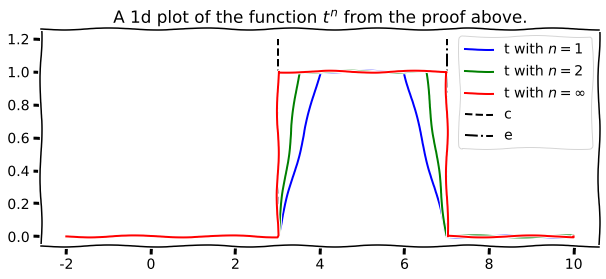

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
plt.xkcd()

relu = lambda x: np.clip(x, 0, np.inf)

t = lambda x, n, c, e: relu(n*x - n*c) - relu(n*x - n*c - 1) + relu(n*x - n*e) - relu(n*x - n*e + 1)

def plot_t(c=3, e=7):
    xs = np.linspace(-2, 10, 1000)

    plt.title(f"A 1d plot of the function $t^n$ from the proof above.")
    plt.plot(xs, t(xs, n=1, c=c, e=e), 'b', label=r"t with $n=1$")
    plt.plot(xs, t(xs, n=2, c=c, e=e), 'g', label=r"t with $n=2$")
    plt.plot(xs, t(xs, n=1e9, c=c, e=e), 'r', label=r"t with $n=\infty$")
    plt.vlines(c, 0, 1.2, 'black', '--', label='c')
    plt.vlines(e, 0, 1.2, 'black', '-.', label='e')
    plt.legend()
    plt.gcf().set_size_inches(10, 4)
    plt.show()

plot_t()

## But wait ...

Recalling the Stone-Weierstrass theorem.

````{prf:theorem} Stone-Weierstrass theorem
:label: stone_weierstrass_thm
Let $f:[a, b]\to\mathbb{R}$ be a continuous function and $\epsilon > 0$. Then there is a polynomial $p$ such that

$$\|f - p \|_\infty < \epsilon.$$
````
So why don't we simply use polynomials?

```{figure} images/scale.png
---
height: 400px
---
Deep Learning: [Shut up and compute](https://en.wikiquote.org/wiki/Shut_up_and_calculate). See also "[The Bitter Lesson](http://www.incompleteideas.net/IncIdeas/BitterLesson.html)".
```

## Exercises
* Think about an $n$-layer MLP. Why does Pinkus's theorem preclude polynomials? I.e., why:

$$\mbox{activation-function} \in \mbox{polynomials} \Rightarrow \mbox{not universal approximator}?$$

* Write a function that takes in
    + a three layer ReLU network as discussed above in the form of a `torch.nn.Sequential` object,
    + $d$ and $e$ in the form of tensors,
    + and $n$ as an integers.

    The function then returns the `torch.nn.Sequential` object with modified weights, such that the object represents $h_n$ for the given $d$, $e$, and $n$.